<a href="https://colab.research.google.com/github/Brianmaina909/Group3/blob/main/Majid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries to do analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv("/content/C4 data.csv")
df.head()

,Month & Year,Month,Month No,Year,SupplierName,Animal,Category,Sub Category,Brand,Item Name,Branch,Qty,Sales,Region
0,31/01/2022,January,1,2022,Sigma Feeds Ltd,Dog,Dry Dog Food,Adult Dog Food,Bravo,Bravo Active Beef Flavour 15Kg,Karen Hub,41,144525,Nairobi
1,31/01/2022,January,1,2022,Sigma Feeds Ltd,Dog,Dry Dog Food,Adult Dog Food,Bravo,Bravo Dog Food Adult Chicken 15Kg,Karen Hub,44,138556,Nairobi
2,31/01/2022,January,1,2022,Canine Biosciences Ltd,Dog,Dry Dog Food,Adult Dog Food,Josera,Josera Josidog Active Dog Food 18Kg,Karen Hub,21,120729,Nairobi
3,31/01/2022,January,1,2022,Gilani Gourmet Ltd,Dog,Dry Dog Food,Adult Dog Food,Gilani Gourmet,Gilani Gourmet Dog Rice 10Kg,Karen Hub,97,116012,Nairobi
4,31/01/2022,January,1,2022,Canine Biosciences Ltd,Dog,Dry Dog Food,Adult Dog Food,Josera,Josera Josidog Regular Dog Food18Kg,Karen Hub,21,113190,Nairobi


In [3]:
df.tail()

,Month & Year,Month,Month No,Year,SupplierName,Animal,Category,Sub Category,Brand,Item Name,Branch,Qty,Sales,Region
216058,31/01/2025,January,37,2025,Merit Africa Ltd,Cat,Wet Cat Food,Gen Cat Food,Catmor,Catmor Cat/F Beef Chunks Gravy 70G,Village Market,1,140,Nairobi
216059,31/01/2025,January,37,2025,Merit Africa Ltd,Cat,Wet Cat Food,Gen Cat Food,Catmor,Catmor Cat/F Adult Chicken Jelly70G,Karen Hub,1,139,Nairobi
216060,31/01/2025,January,37,2025,Dc Fr Hub Export,Dog,Dog Treats,Treats,CRF,Crf Chicken Sticks For Dogs 100G+,Kisumu 2,1,111,Nyanza
216061,31/01/2025,January,37,2025,Dc Fr Hub Export,Dog,Dog Treats,Treats,CRF,Crf Chicken Sticks For Dogs 100G+,Valley Arcade,1,111,Nairobi
216062,31/01/2025,January,37,2025,Dc Fr Hub Export,Dog,Dog Treats,Treats,CRF,Crf Chicken Sticks For Dogs 100G+,Village Market,1,111,Nairobi


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216063 entries, 0 to 216062
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Month & Year  216063 non-null  object
 1   Month         216063 non-null  object
 2   Month No      216063 non-null  int64 
 3   Year          216063 non-null  int64 
 4   SupplierName  216063 non-null  object
 5   Animal        216063 non-null  object
 6   Category      216063 non-null  object
 7   Sub Category  216063 non-null  object
 8   Brand         216063 non-null  object
 9   Item Name     216063 non-null  object
 10  Branch        216063 non-null  object
 11  Qty           216063 non-null  int64 
 12  Sales         216063 non-null  int64 
 13  Region        216063 non-null  object
dtypes: int64(4), object(10)
memory usage: 23.1+ MB


In [5]:
# prompt: code to get no of suppliers by year

supplier_by_year = df.groupby('Year')['SupplierName'].nunique()
supplier_by_year


,SupplierName
Year,
2022,13
2023,14
2024,18
2025,13


In [6]:
# prompt: code to get no of suppliers by year and print new suppliers each year

import pandas as pd

# Assuming your DataFrame is named 'df' and already loaded
# If not, load it first:
# df = pd.read_csv("/content/C4 data.csv")

supplier_by_year = df.groupby('Year')['SupplierName'].nunique()
print(supplier_by_year)

# Find new suppliers each year
new_suppliers_each_year = {}
all_suppliers = set()

for year, num_suppliers in supplier_by_year.items():
    suppliers_this_year = set(df[df['Year'] == year]['SupplierName'])
    new_suppliers = suppliers_this_year - all_suppliers
    new_suppliers_each_year[year] = new_suppliers
    all_suppliers.update(suppliers_this_year)

for year, new_suppliers in new_suppliers_each_year.items():
    print(f"\nNew Suppliers in {year}:")
    if new_suppliers:
        for supplier in new_suppliers:
            print(supplier)
    else:
        print("No new suppliers this year.")


Year
2022    13
2023    14
2024    18
2025    13
Name: SupplierName, dtype: int64

New Suppliers in 2022:
Loki Ventures Ltd
Heritage Foods Kenya Ltd
Smart Brands Ltd
Canine Biosciences Ltd
Sigma Feeds Ltd
Sensations Ltd
Brand Imports (Africa) Ltd
Gourmet Foods Int. Ltd
Merit Africa Ltd
Ramji Haribhai Devani Ltd
Storesome Trading Company Ltd
Brand Royalty Ltd
Gilani Gourmet Ltd

New Suppliers in 2023:
Kapi Ltd

New Suppliers in 2024:
Generic Brands Ltd
Jade Concepts Ltd
Dc Fr Hub Export
Kamili Packers Ltd

New Suppliers in 2025:
No new suppliers this year.


In [7]:
# prompt: code to show market share for each of the new suppliers in 2024, and their market share as a pie chart

# Assuming your DataFrame is named 'df' and already loaded
# If not, load it first:
# df = pd.read_csv("/content/C4 data.csv")

# Filter data for 2024
df_2024 = df[df['Year'] == 2024]

# Calculate market share for each supplier in 2024 (assuming a 'Sales' column exists)
if 'Sales' in df_2024.columns:
    market_share_2024 = df_2024.groupby('SupplierName')['Sales'].sum() / df_2024['Sales'].sum()
else:
    print("Error: 'Sales' column not found. Please replace 'Sales' with the actual column name representing sales or market share.")
    # You might want to exit the script here or handle the error differently
    exit()


# Find new suppliers in 2024 (assuming the previous code to identify new suppliers is executed)
new_suppliers_2024 = new_suppliers_each_year.get(2024, set())


# Filter market share for new suppliers only
new_supplier_market_share = market_share_2024[market_share_2024.index.isin(new_suppliers_2024)]

# Print the market share data for new suppliers
print("Market Share of New Suppliers in 2024:")
new_supplier_market_share


Market Share of New Suppliers in 2024:


,Sales
SupplierName,
Dc Fr Hub Export,0.012997
Generic Brands Ltd,0.000274
Jade Concepts Ltd,0.000149
Kamili Packers Ltd,0.004882


there were 14 suppliers in 2023 and 18 in 2024, the 4 for new suppliers were as follows with their repsctive market share

Dc Fr Hub Export	0.012997
Generic Brands Ltd	0.000274
Jade Concepts Ltd	0.000149
Kamili Packers Ltd	0.004882







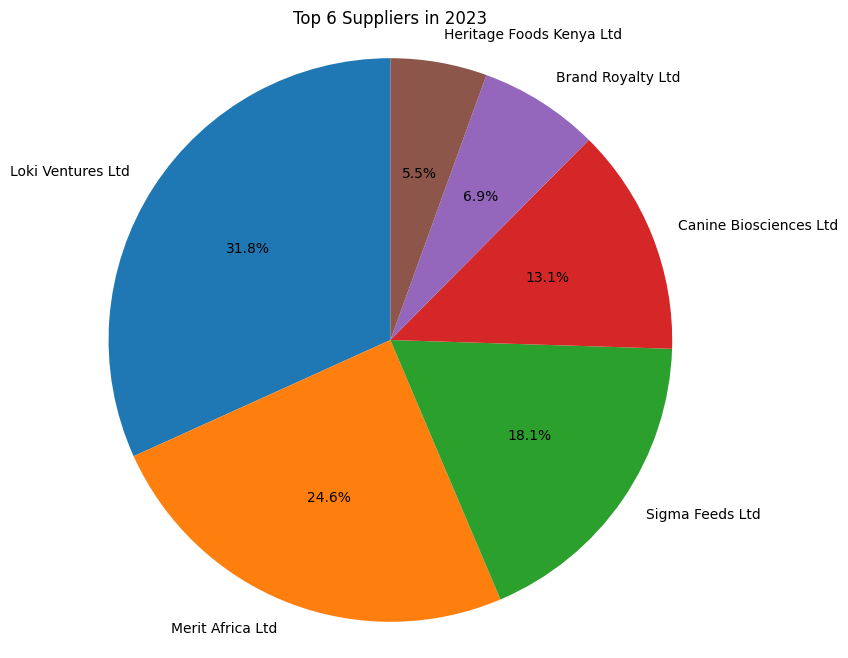

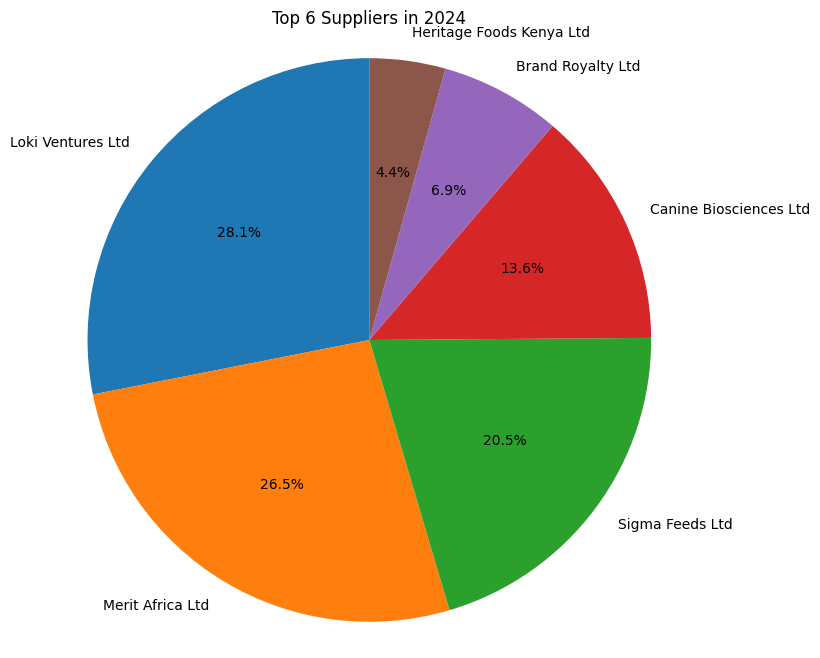


Difference in Performance (Market Share):
Loki Ventures Ltd: -3.60%
Heritage Foods Kenya Ltd: -1.13%
Canine Biosciences Ltd: 0.44%
Sigma Feeds Ltd: 2.15%
Merit Africa Ltd: 1.62%
Brand Royalty Ltd: -0.02%


In [8]:

def plot_top_suppliers(df, year):
    # Filter data for the specified year
    df_year = df[df['Year'] == year]

    # Check if 'Sales' column exists
    if 'Sales' not in df_year.columns:
        print(f"Error: 'Sales' column not found in data for {year}. Please replace 'Sales' with the actual column name.")
        return

    # Calculate market share for each supplier
    market_share = df_year.groupby('SupplierName')['Sales'].sum() / df_year['Sales'].sum()

    # Sort suppliers by market share and get the top 6
    top_suppliers = market_share.sort_values(ascending=False).head(6)

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(top_suppliers, labels=top_suppliers.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Top 6 Suppliers in {year}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    return top_suppliers


# Plot for 2023
top_suppliers_2023 = plot_top_suppliers(df, 2023)

# Plot for 2024
top_suppliers_2024 = plot_top_suppliers(df, 2024)

# Compare performance (example: print difference in market share for common suppliers)
common_suppliers = set(top_suppliers_2023.index) & set(top_suppliers_2024.index)

print("\nDifference in Performance (Market Share):")
for supplier in common_suppliers:
    diff = top_suppliers_2024[supplier] - top_suppliers_2023[supplier]
    print(f"{supplier}: {diff:.2%}")


Loki Ventures Ltd maintained its position as the market leader in both 2023 and 2024, despite experiencing a 3.60% decline in market share. Meanwhile, competitors saw varied performance, with Sigma Feeds Ltd recording the most significant growth at +2.15%, followed by Merit Africa Ltd at +1.62%.
A breakdown of market share growth among the top six suppliers is as follows:
            •	Sigma Feeds Ltd: +2.15% (highest growth)
            •	Merit Africa Ltd: +1.62%
            •	Canine Biosciences Ltd: +0.44%
            •	Brand Royalty Ltd: -0.02% (minimal decline)



<ipython-input-18-0a9dcaf5ad62>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df[df['SupplierName'] == 'Sigma Feeds Ltd'].groupby(['Year', 'Month'])['Sales'].sum().reset_index()


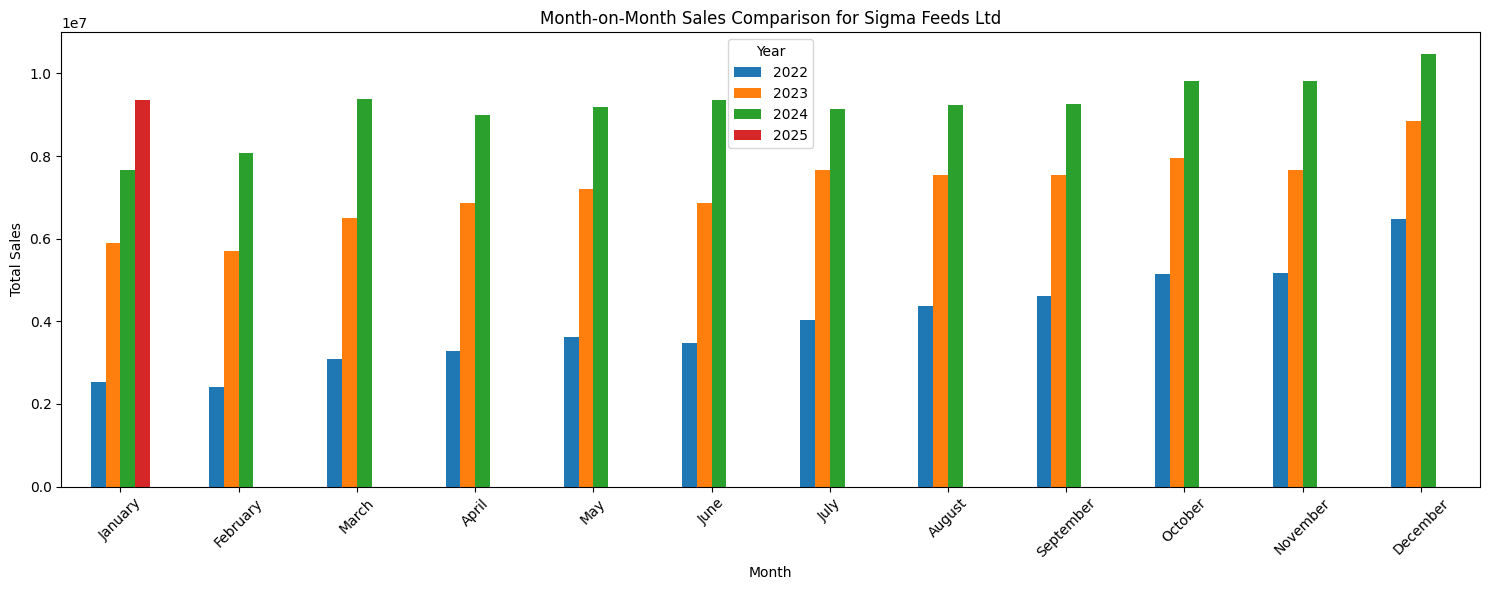


Monthly Sales for 2022:

Monthly Sales for 2023:

Monthly Sales for 2024:

Monthly Sales for 2025:


,2025
Month,
January,9355496
February,0
March,0
April,0
May,0
June,0
July,0
August,0
September,0


In [18]:
# prompt: from our df give me a code to do month on month analysis of Sigma Feeds, do bar charts and print out monthly sales for each year so that we can compare. note that our df does not have a date column instead we have Month & Year and let the months follow as per calendar year

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and already loaded
# If not, load it first:
# df = pd.read_csv("/content/C4 data.csv")

# Convert 'Month' and 'Year' to datetime objects
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) , format='%Y-%B')


# Group by month and year and sum up sales of sigma feeds
monthly_sales = df[df['SupplierName'] == 'Sigma Feeds Ltd'].groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Pivot the table to have years as columns and months as index
pivot_sales = monthly_sales.pivot(index='Month', columns='Year', values='Sales')


# Create the month-on-month bar chart
pivot_sales.plot(kind='bar', figsize=(15, 6))
plt.title('Month-on-Month Sales Comparison for Sigma Feeds Ltd')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Year')
plt.tight_layout()
plt.show()

# Print monthly sales for each year
for year in pivot_sales.columns:
    print(f'\nMonthly Sales for {year}:')
pivot_sales[year]


Sigma Feeds Ltd experienced consistent growth in 2024 compared to 2023, with an increase in sales across all months.
Key Observations:
•	Strong Growth in Q1: Sales in January (+30.0%), February (+41.6%), and March (+44.0%) saw significant increases, indicating strong demand at the beginning of 2024.
•	Steady Gains in Q2 & Q3: Growth remained positive but stabilized in April (+31.4%), May (+27.5%), June (+36.0%), July (+19.3%), August (+22.5%), and September (+22.5%).
•	Peak Performance in Q4: Sales surged in October (+23.3%), November (+27.9%), and December (+18.3%), with December reaching the highest recorded sales at 10.47M.
•	Overall, Sigma Feeds Ltd demonstrated strong and consistent growth throughout 2024, with its most significant increase in February (+41.6%) and March (+44.0%).


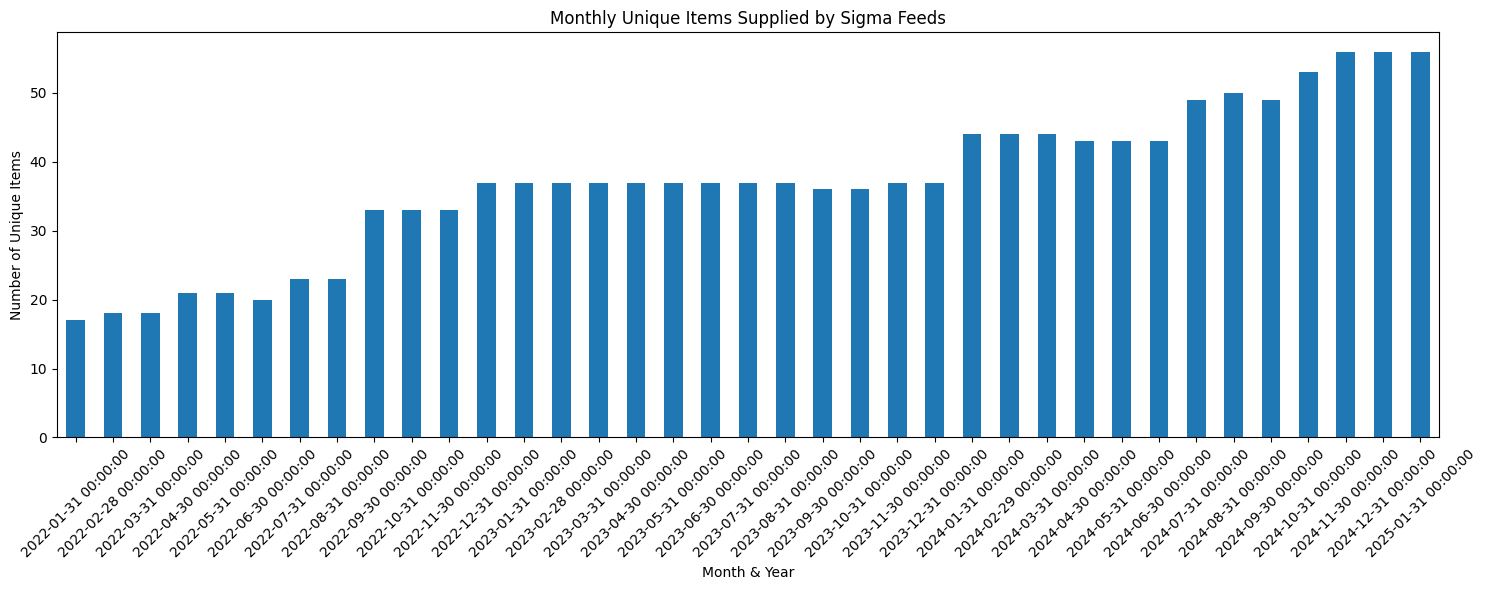


Count of Unique Items Supplied by Sigma Feeds Each Month:

Month & Year
2022-01-31    17
2022-02-28    18
2022-03-31    18
2022-04-30    21
2022-05-31    21
2022-06-30    20
2022-07-31    23
2022-08-31    23
2022-09-30    33
2022-10-31    33
2022-11-30    33
2022-12-31    37
2023-01-31    37
2023-02-28    37
2023-03-31    37
2023-04-30    37
2023-05-31    37
2023-06-30    37
2023-07-31    37
2023-08-31    37
2023-09-30    36
2023-10-31    36
2023-11-30    37
2023-12-31    37
2024-01-31    44
2024-02-29    44
2024-03-31    44
2024-04-30    43
2024-05-31    43
2024-06-30    43
2024-07-31    49
2024-08-31    50
2024-09-30    49
2024-10-31    53
2024-11-30    56
2024-12-31    56
2025-01-31    56
Name: Item Name, dtype: int64

Month with the most unique items: November 2024, Count: 56

Most supplied item by Sigma Feeds: Bravo Dog Food Adult Chicken 2Kg


In [35]:
# prompt: code to give the count of unique items supplied by Sigma Feeds every month to help us look at new items introduced each month throughout the month, the date columns is 'Month & Year' and items are in 'Item Name' column and lets do a bar chart for month on month for Sigma Feeds and also print out the count of items supplied and the most supplied and what month and year all by sigma feeds

# Assuming your DataFrame is named 'df' and already loaded
# If not, load it first:
# df = pd.read_csv("/content/C4 data.csv")

# Convert 'Month & Year' to datetime objects if not already done
if not pd.api.types.is_datetime64_any_dtype(df['Month & Year']):
    df['Month & Year'] = pd.to_datetime(df['Month & Year'])

# Filter data for Sigma Feeds
sigma_feeds_df = df[df['SupplierName'] == 'Sigma Feeds Ltd']


# Group by month and year, count unique items
monthly_unique_items = sigma_feeds_df.groupby('Month & Year')['Item Name'].nunique()

# Bar chart for month-on-month unique items
plt.figure(figsize=(15, 6))
monthly_unique_items.plot(kind='bar')
plt.title('Monthly Unique Items Supplied by Sigma Feeds')
plt.xlabel('Month & Year')
plt.ylabel('Number of Unique Items')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the count of items supplied each month
print("\nCount of Unique Items Supplied by Sigma Feeds Each Month:\n")
print(monthly_unique_items)

# Find the month with the most unique items
max_items_month = monthly_unique_items.idxmax()
max_items_count = monthly_unique_items.max()

print(f"\nMonth with the most unique items: {max_items_month.strftime('%B %Y')}, Count: {max_items_count}")

# Identify the most supplied item overall for Sigma Feeds
most_supplied_item = sigma_feeds_df['Item Name'].mode().iloc[0]

print(f"\nMost supplied item by Sigma Feeds: {most_supplied_item}")


<ipython-input-28-93e35f48ded0>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + ' ' + df['Month'].astype(str))



Best Month: 2024-03
Worst Month: 2022-02


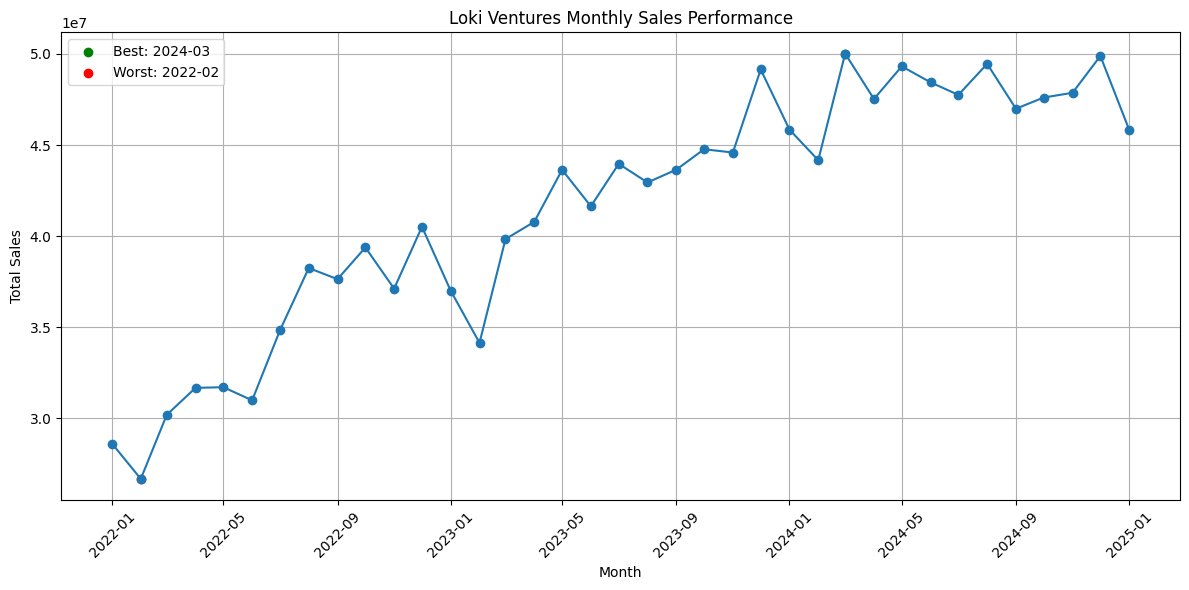

In [28]:
# Convert 'Month' to categorical and order them correctly
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Combine 'Month' and 'Year' to create a 'Date' column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + ' ' + df['Month'].astype(str))

# Group data by the new 'Date' column and sum sales for each month
monthly_sales = df.groupby('Date')['Sales'].sum()

# Find the best and worst months
best_month = monthly_sales.idxmax()
worst_month = monthly_sales.idxmin()

print(f"\nBest Month: {best_month.strftime('%Y-%m')}")
print(f"Worst Month: {worst_month.strftime('%Y-%m')}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Loki Ventures Monthly Sales Performance')
plt.grid(True)

# Highlight best and worst months
plt.scatter(best_month, monthly_sales[best_month], color='green', label=f'Best: {best_month.strftime("%Y-%m")}')
plt.scatter(worst_month, monthly_sales[worst_month], color='red', label=f'Worst: {worst_month.strftime("%Y-%m")}')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-29-0f28b4072853>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loki_monthly_sales = loki_sales.groupby(['Year', 'Month'])['Sales'].sum()


Year           2022      2023      2024      2025
Month                                            
January    10211000  11612407  13337396  11843514
February    9699679  10756537  12187491         0
March       9894880  13073590  14072638         0
April       9050515  13645009  13744281         0
May         9672987  13834422  13739730         0
June        9552684  11987791  12080108         0
July       11443564  12315308  11954095         0
August     12609797  11807014  11976882         0
September  11850225  12018121  11350218         0
October    11942139  12931361  11821361         0
November   11023040  12689408  12169994         0
December   12369512  14594381  12661997         0


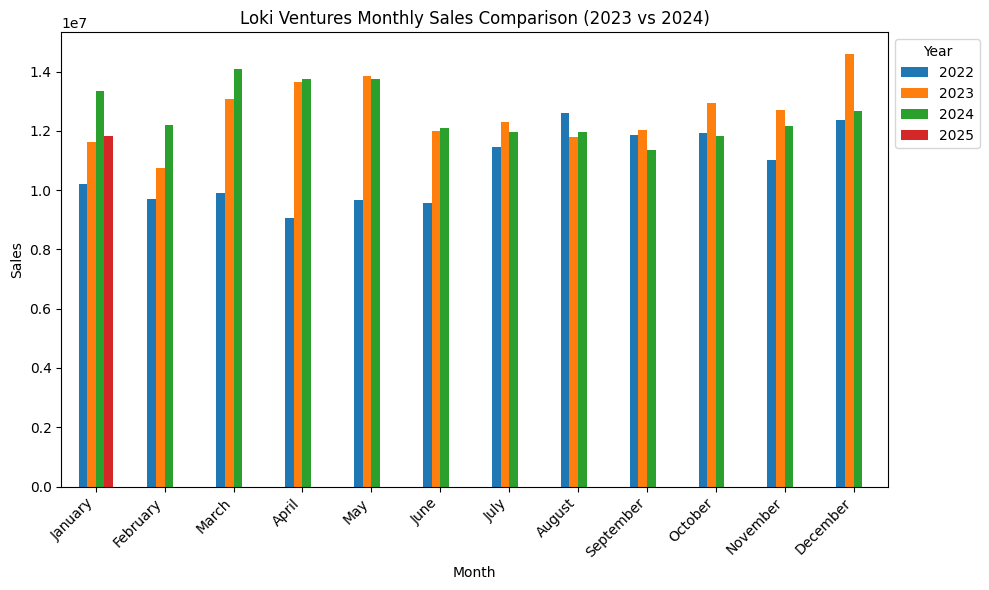

In [29]:
# Filter data for Loki Ventures
loki_sales = df[df['SupplierName'] == 'Loki Ventures Ltd']

# Group by year and month and sum sales
loki_monthly_sales = loki_sales.groupby(['Year', 'Month'])['Sales'].sum()

# Create a DataFrame for better visualization
loki_sales_df = loki_monthly_sales.reset_index()

# Pivot the table to have years as columns and months as rows
loki_sales_pivot = loki_sales_df.pivot(index='Month', columns='Year', values='Sales')

# Print the sales comparison
print(loki_sales_pivot)

loki_sales_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Loki Ventures Monthly Sales Comparison (2023 vs 2024)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')  # Ensures month labels are readable
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))  # Moves the legend outside
plt.tight_layout()
plt.show()
